In [190]:
# Run some setup code for this notebook.

import matplotlib.pyplot as plt


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Dataset

In [191]:
import pandas as pd
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [193]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [194]:
################################################################################
# TODO:                                                                        #
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value #
################################################################################
#用平均值填充LoanAmount缺失值
import numpy as np
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)
# 计算性别的分布频率
gender_distribution = df['Gender'].dropna().value_counts(normalize=True)
# 对缺失的性别进行填充
missing_indices = df[df['Gender'].isnull()].index
for i in missing_indices:
    # 根据分布随机选择性别
    df.at[i, 'Gender'] = np.random.choice(gender_distribution.index, p=gender_distribution.values)
# 计算已婚的分布频率
married_distribution = df['Married'].dropna().value_counts(normalize=True)
# 对缺失的已婚进行填充
missing_indices = df[df['Married'].isnull()].index
for i in missing_indices:
    # 根据分布随机选择已婚
    df.at[i, 'Married'] = np.random.choice(married_distribution.index, p=married_distribution.values)
# 计算自雇的分布频率
self_employed_distribution = df['Self_Employed'].dropna().value_counts(normalize=True)
# 对缺失的自雇进行填充
missing_indices = df[df['Self_Employed'].isnull()].index
for i in missing_indices:
    # 根据分布随机选择自雇
    df.at[i, 'Self_Employed'] = np.random.choice(self_employed_distribution.index, p=self_employed_distribution.values)
# 记录独立性的分布概率
dependents_distribution = df['Dependents'].dropna().value_counts(normalize=True)
# 对缺失的独立性进行填充
missing_indices = df[df['Dependents'].isnull()].index
for i in missing_indices:
    # 根据分布随机选择独立性
    df.at[i, 'Dependents'] = np.random.choice(dependents_distribution.index, p=dependents_distribution.values)
df.isnull().sum()
df.head()
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## Encode 

In [195]:
################################################################################
# TODO:                                                                        #
# Task2 deal with categorical features
# Tip use pd.get_dummies. 
################################################################################
df_encoded = pd.get_dummies(df.drop(columns=['Loan_Status']))
df_encoded['Loan_Status'] = df['Loan_Status']
df_encoded['Loan_Status'] = df_encoded['Loan_Status'].map(lambda x: 1 if x == 'Y' else 0)
df=df_encoded
df.head()
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,True,1
1,4583,1508.0,128.000000,360.0,1.0,False,True,False,True,False,...,False,False,True,False,True,False,True,False,False,0
2,3000,0.0,66.000000,360.0,1.0,False,True,False,True,True,...,False,False,True,False,False,True,False,False,True,1
3,2583,2358.0,120.000000,360.0,1.0,False,True,False,True,True,...,False,False,False,True,True,False,False,False,True,1
4,6000,0.0,141.000000,360.0,1.0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,True,1


## Data process

In [196]:

################################################################################
# TODO:                                                                        #
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization
################################################################################
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

## Train

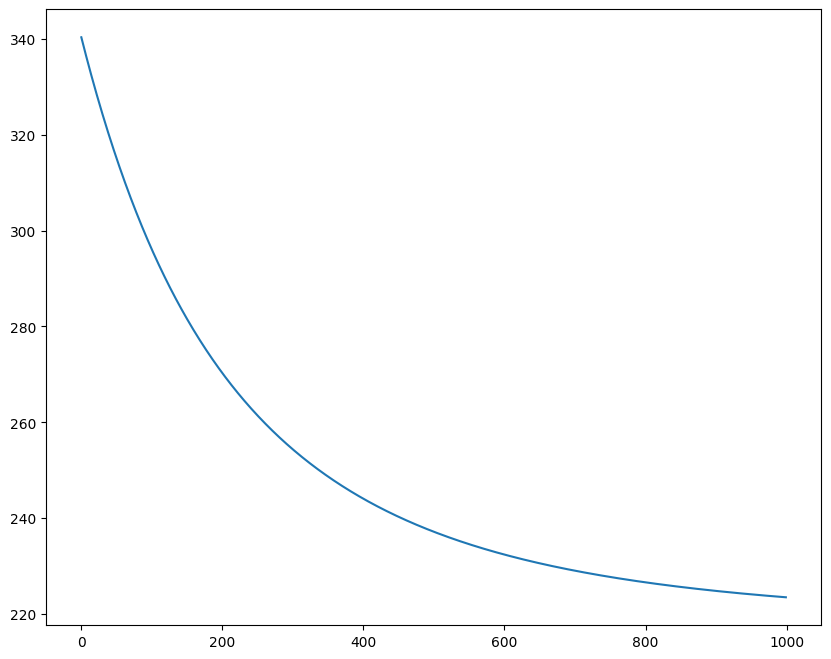

accuracy = 0.8048780487804879


In [217]:
from Logistic import LogisticRegression
import matplotlib.pyplot as plt

################################################################################
# TODO:                                                                        #
# Task4 train your model and plot the loss curve of training
# You need to complete the Logistic.py file
# model = LogisticRegression()
################################################################################
model1 = LogisticRegression(penalty = "l2", gamma =1)
loss = model1.fit(X_train, y_train,lr=0.01,tol=1e-7, max_iter=1e3)
plt.plot(loss)
plt.show()
y_pred = model1.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(f"accuracy = {accuracy}")

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

In [218]:
from sklearn.linear_model import LogisticRegression

#与sklearn库中的逻辑回归进行比较
model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(f"accuracy = {accuracy}")

accuracy = 0.7967479674796748


## Test

In [145]:
################################################################################
# TODO:                                                                        #
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
################################################################################
#计算分类准确率
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

accuracy = 0.7886178861788617
